In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
fname = "outputKaggle.xlsx"
original = pd.read_excel(fname)

In [3]:
original.head()

,company,employmenttype_jobstatus,jobid,joblocation_address,jobtitle,shift,site_name,uniq_id,python,scala,...,perforce,maya,blockchain,rust,haskell,erlang,clojure,html5,YOE,Min Ed Level
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,Telecommuting not available|Travel not required,NaN,418ff92580b270ef4e7c14f0ddfc36b4,0,1,...,0,0,0,0,0,0,0,0,1.0,NaN
1,University of Chicago/IT Services,Full Time,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,Telecommuting not available|Travel not required,NaN,8aec88cba08d53da65ab99cf20f6f9d9,1,0,...,0,0,0,0,0,0,0,0,2.0,bachelor
2,"Galaxy Systems, Inc.",Full Time,Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,Telecommuting not available|Travel not required,NaN,46baa1f69ac07779274bcd90b85d9a72,0,0,...,0,0,0,0,0,0,0,0,5.0,NaN
3,TransTech LLC,Full Time,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Telecommuting not available|Travel not required,NaN,3941b2f206ae0f900c4fba4ac0b18719,0,0,...,0,0,0,0,0,0,0,0,2.0,bachelor
4,Matrix Resources,Full Time,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,Telecommuting not available|Travel not required,NaN,45efa1f6bc65acc32bbbb953a1ed13b7,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
def pre_clean(original):
    df = original.drop(columns=['employmenttype_jobstatus', 'jobid', 'shift', 'site_name']).drop('Sum').set_index('uniq_id')
    ids = df.index
    state_list = list()
    city_list = list()
    for index in ids:
        loc = df['joblocation_address'][index]
        if pd.isna(loc):
            df = df.drop(index)
        else:
            loc_split = loc.split(', ')
            if len(loc_split) == 1:
                df = df.drop(index)
            else:
                city = loc.split(', ')[0]
                state = loc.split(', ')[1].upper()
                if len(state) != 2:
                    df = df.drop(index)
                else:
                    state_list.append(state)
                    city_list.append(city)
    df.insert(loc=2, column='city', value=city_list)
    df.insert(loc=3, column='state', value=state_list)
    df = df.drop(columns=['joblocation_address'])
    return df

In [5]:
df = pre_clean(original)

In [6]:
print(df.shape)
df.head()

(21924, 135)


,company,city,state,jobtitle,python,scala,.net,c#,matlab,simulink,...,perforce,maya,blockchain,rust,haskell,erlang,clojure,html5,YOE,Min Ed Level
uniq_id,,,,,,,,,,,,,,,,,,,,,
418ff92580b270ef4e7c14f0ddfc36b4,"Digital Intelligence Systems, LLC",Atlanta,GA,AUTOMATION TEST ENGINEER,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,NaN
8aec88cba08d53da65ab99cf20f6f9d9,University of Chicago/IT Services,Chicago,IL,Information Security Engineer,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,bachelor
46baa1f69ac07779274bcd90b85d9a72,"Galaxy Systems, Inc.",Schaumburg,IL,Business Solutions Architect,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,NaN
3941b2f206ae0f900c4fba4ac0b18719,TransTech LLC,Bolingbrook,IL,"Java Developer (mid level)- FT- GREAT culture,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,bachelor
45efa1f6bc65acc32bbbb953a1ed13b7,Matrix Resources,Atlanta,GA,DevOps Engineer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


## Question to answer
1. For each state, how many jobs are available (could create heat map if possible)
2. For each state, list the top 5 cities with most jobs available.
3. List 10 companies that offer most technology jobs
4. Among all the jobs, count the number of occurrence for each skill and list the top10 popular skills
5. For the five cites with most jobs, list the top5 popular skills (check whether the need for skills may vary among cities)
6. The top five popular Database used
7. For each education level, what’s the average years of experience needed.
8. Based on the years of experience, compare the number of jobs available that needs YOE =0(New Grad), 1-4(Junior), >5(Senior).
9. Compare whether skills needed for different job titles vary.

### 1. For each state, how many jobs are available (could create heat map if possible)

In [98]:
import plotly.graph_objects as go

In [103]:
state_dict = dict()
for state_value in df['state']:
    if state_value in state_dict:
        state_dict[state_value] += 1
    else:
        state_dict[state_value] = 1
print(state_dict)

{'GA': 1926, 'IL': 626, 'NY': 2210, 'WA': 1384, 'CA': 4621, 'CO': 219, 'OR': 74, 'NV': 41, 'MO': 155, 'NJ': 1821, 'MN': 198, 'TX': 1925, 'UT': 48, 'SC': 55, 'PA': 777, 'FL': 355, 'AZ': 175, 'VA': 744, 'KS': 47, 'MD': 422, 'QC': 23, 'DC': 263, 'TN': 78, 'MI': 216, 'MA': 1364, 'CT': 745, 'WI': 180, 'NC': 280, 'OH': 268, 'OK': 23, 'AL': 24, 'DE': 58, 'RI': 101, 'NH': 73, 'ME': 43, 'VT': 7, 'KY': 45, 'NE': 63, 'IN': 52, 'IA': 64, 'WV': 3, 'LA': 39, 'SD': 4, 'ID': 12, 'AR': 5, 'ON': 27, 'NM': 8, 'HI': 10, 'AB': 4, 'NS': 1, 'AK': 5, 'BC': 5, 'MS': 4, 'ND': 1, 'WY': 3}


In [109]:
# the only state with no jobs posted
state_dict['MT'] = 0

In [110]:
state_df = pd.DataFrame({'state': list(state_dict.keys()), 'num_of_jobs': list(state_dict.values())})
state_df

,state,num_of_jobs
0,GA,1926
1,IL,626
2,NY,2210
3,WA,1384
4,CA,4621
5,CO,219
6,OR,74
7,NV,41
8,MO,155
9,NJ,1821


In [112]:
fig = go.Figure(data=go.Choropleth(
    locations=state_df['state'], # Spatial coordinates
    z = state_df['num_of_jobs'].astype(int), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "",
))

fig.update_layout(
    title_text = 'Number of jobs posted by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

### 3. List 10 companies that offer most technology jobs

In [23]:
company_job_num = dict()
for company in df['company']:
    if company in company_job_num:
        company_job_num[company] += 1
    else:
        company_job_num[company] = 1
company_job_num = dict(sorted(company_job_num.items(), key=lambda item:item[1], reverse=True))

In [24]:
company_job_num

{'CyberCoders': 335,
 'Amazon': 262,
 'Robert Half': 249,
 'Robert Half Technology': 247,
 'U.S. Tech Solutions Inc.': 188,
 'Collabera': 178,
 'Visionaire Partners': 171,
 'Kforce Inc.': 161,
 'The Judge Group': 153,
 'Apex Systems, Inc': 151,
 'Net2Source Inc.': 139,
 'Modis': 139,
 'Deloitte': 138,
 'Randstad Technologies': 114,
 'TEKsystems, Inc.': 108,
 'NORTHROP GRUMMAN': 95,
 'Maxonic, Inc.': 92,
 'RSM US': 92,
 'Experis': 84,
 'Access Staffing': 83,
 'iTech Solutions, Inc': 79,
 'Synechron Inc.': 78,
 'Request Technology, LLC': 73,
 'TeamSoft': 73,
 'Wipro Ltd.': 69,
 'Principle Solutions Group': 67,
 'INSYS Group': 66,
 'Confidential Company': 66,
 'TAD PGS, Inc': 63,
 'TRIAD Group': 62,
 'Aureus Group': 60,
 'eclaro': 59,
 'Xoriant Corporation': 58,
 'HCL America Inc.': 57,
 'Pyramid Consulting, Inc.': 53,
 'HALLMARK GLOBAL TECHNOLOGIES INC': 52,
 'Uber': 51,
 'K2 Partnering Solutions, Inc.': 50,
 nan: 50,
 'BayOne Solutions': 49,
 'NTT DATA, Inc.': 48,
 'Mitchell Martin, Inc

In [25]:
list(company_job_num.keys())[:10]

['CyberCoders',
 'Amazon',
 'Robert Half',
 'Robert Half Technology',
 'U.S. Tech Solutions Inc.',
 'Collabera',
 'Visionaire Partners',
 'Kforce Inc.',
 'The Judge Group',
 'Apex Systems, Inc']

([<matplotlib.axis.YTick at 0x116862940>,
 <a list of 10 Text yticklabel objects>)

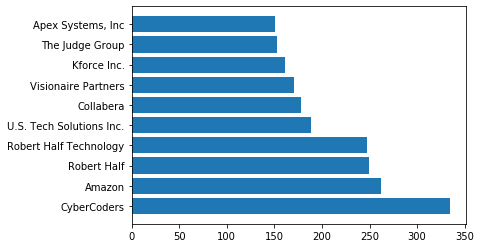

In [96]:
plt.barh(range(10), list(company_job_num.values())[:10])
plt.yticks(range(10), list(company_job_num.keys())[:10])

### 4. Among all the jobs, count the number of occurrence for each skill and list the top10 popular skills

In [55]:
type(list(df['python']))

list

In [85]:
cols = df.columns
skill_cols = list(cols[4:][:-2])

In [86]:
skill_cols

['python',
 'scala',
 '.net',
 'c#',
 'matlab',
 'simulink',
 'linux',
 'agile',
 'ns3',
 'opnet',
 'snmp',
 'rmon',
 'wireshark',
 'penetration testing',
 'java',
 'secure boot',
 'tcp/ip',
 'udp',
 'javascript',
 'mongodb',
 'mysql',
 'amazon web services',
 'aws',
 'oracle',
 'redis',
 'react',
 'backbone',
 'angular',
 'google cloud platform',
 'html',
 'css',
 'x86',
 'powerpc',
 'arm',
 'device drivers',
 'vmware esx',
 'nosql',
 'sql',
 'bitbucket',
 'confluence',
 'jenkins',
 'doxygen',
 'communication',
 'teamwork',
 'dspace',
 'vehiclespy',
 'canalyzer',
 'webgl',
 'distributed',
 'kafka',
 'angularjs',
 'mithrilinteractive',
 'ui/ux',
 'opengl',
 'ios',
 'android',
 'julia',
 'visualbasic',
 'cobol',
 'jira',
 'gitlab',
 'redux',
 'express.js',
 'django',
 'celery',
 'elasticsearch',
 'ansible',
 'rundeck',
 'cicd',
 'aws cli',
 'svn',
 'xcode',
 'fastlane',
 'devops',
 'machine learning',
 'cnn',
 'azure paas',
 't-sql',
 'ado.net',
 'xml',
 'netsolid',
 'css2',
 'ms sql se

In [91]:
skill_sum_dict = dict()
for skill_name in skill_cols:
    s = 0
    for e in list(df[skill_name]):
        s += e
    skill_sum_dict[skill_name] = s
skill_sum_dict = dict(sorted(skill_sum_dict.items(), key=lambda item:item[1], reverse=True))

In [92]:
skill_sum_dict

{'communication': 10499,
 'sql': 6927,
 'java': 6802,
 'agile': 4140,
 'scala': 3346,
 'javascript': 3281,
 'linux': 3225,
 'oracle': 3045,
 'html': 2964,
 '.net': 2722,
 'git': 2589,
 'css': 2341,
 'python': 2130,
 'unix': 2072,
 'c#': 2033,
 'aws': 1918,
 'perl': 1905,
 'ios': 1770,
 'xml': 1678,
 'oop': 1593,
 'angular': 1539,
 'distributed': 1441,
 'arm': 1349,
 'c++': 1324,
 's3': 1087,
 'html5': 1067,
 'rust': 1012,
 'mysql': 993,
 'json': 956,
 'hadoop': 883,
 'devops': 863,
 'jenkins': 809,
 'nosql': 801,
 'android': 749,
 'tcp/ip': 748,
 'angularjs': 726,
 'jira': 655,
 'react': 652,
 'teamwork': 602,
 'puppet': 530,
 'chef': 522,
 'maven': 494,
 'spark': 475,
 'mongodb': 458,
 'rdbms': 443,
 'junit': 419,
 'docker': 395,
 'backbone': 378,
 'amazon web services': 369,
 'svn': 346,
 'ms sql server': 341,
 'machine learning': 333,
 't-sql': 324,
 'ansible': 308,
 'hbase': 303,
 'rest api': 285,
 'kafka': 278,
 'redis': 260,
 'ui/ux': 224,
 'swift': 214,
 'postgresql': 213,
 'ec2